# Exercise: Advanced Data Analysis and Manipulation with NumPy and Pandas

## Task:

### Data Creation:

- Create a NumPy array representing daily stock prices for a company over two years (730 days). Include the open, high, low, close prices, and volume traded for each day.

### Data Manipulation with Pandas:
- Convert the NumPy array into a Pandas DataFrame with appropriate column names: ['Open', 'High', 'Low', 'Close', 'Volume'].
- Add a new column to calculate the daily price change percentage ((Close - Open) / Open * 100).
- Resample the data to obtain the monthly average Open, High, Low, Close prices, and total Volume.
- Calculate the rolling 30-day average of the Close prices.

### Analysis and Visualization:
- Identify and plot the top 5 days with the highest percentage gain.
- Create a dual-axis plot showing both the monthly average Close prices and the total volume traded.


## Step-by-Step Instructions:

### Create the NumPy Array
- Use np.random functions to generate the stock prices and volume data, ensuring that the prices make logical sense (e.g., Low <= Open <= Close <= High).

### Convert to Pandas DataFrame
- Create a DataFrame with appropriate columns and index (using pd.date_range for dates).
- Add calculated columns for analysis.

### Advanced Manipulation
- Use resampling and rolling operations to aggregate and analyze the data.

### Data Visualization
- Use plt functions to visualize key insights from the data.


/var/folders/qz/ncpxlmfj0ln46r4kg3jylt140000gn/T/ipykernel_46559/1030623290.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').agg({


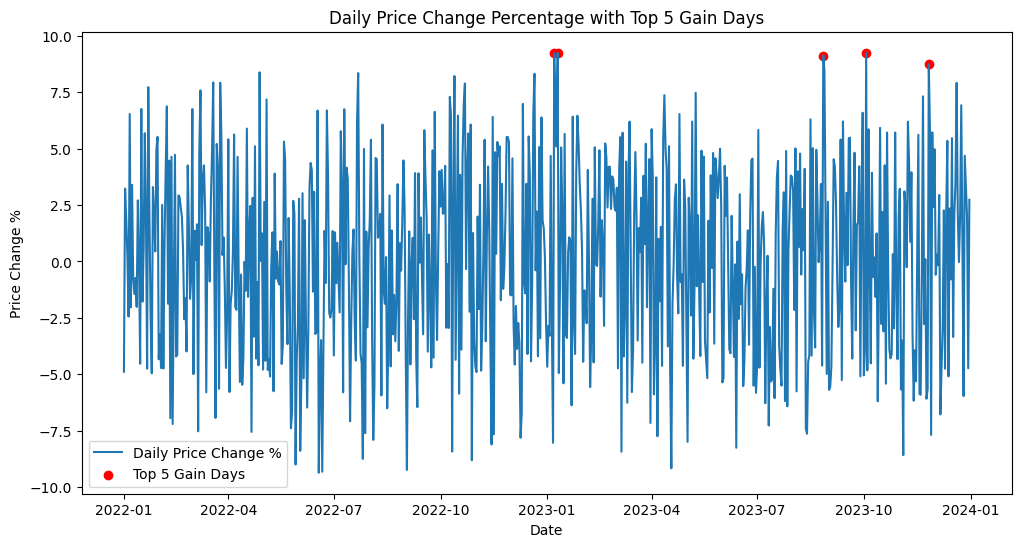

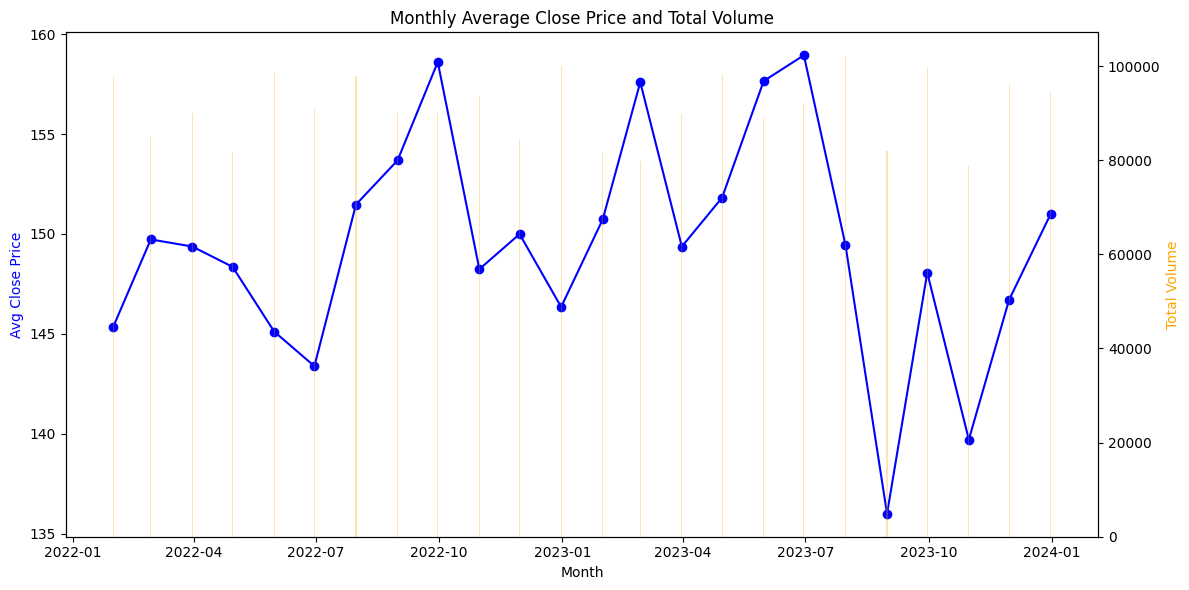

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create the NumPy array for stock data
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start='2022-01-01', periods=730)
open_prices = np.random.uniform(100, 200, 730)
close_prices = open_prices + np.random.uniform(-10, 10, 730)
high_prices = np.maximum(open_prices, close_prices) + np.random.uniform(0, 5, 730)
low_prices = np.minimum(open_prices, close_prices) - np.random.uniform(0, 5, 730)
volumes = np.random.randint(1000, 5000, 730)

stock_data = np.column_stack([open_prices, high_prices, low_prices, close_prices, volumes])

# Step 2: Convert to a Pandas DataFrame
df = pd.DataFrame(stock_data, columns=['Open', 'High', 'Low', 'Close', 'Volume'], index=dates)

# Calculate the daily price change percentage
df['Price Change %'] = (df['Close'] - df['Open']) / df['Open'] * 100

# Step 3: Resample data to get monthly averages
monthly_data = df.resample('M').agg({
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean',
    'Volume': 'sum'
})

# Calculate the rolling 30-day average of the Close prices
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Step 4: Data Visualization

# Identify the top 5 days with the highest percentage gain
top_5_days = df.nlargest(5, 'Price Change %')

# Plotting the top 5 days with the highest percentage gain
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price Change %'], label='Daily Price Change %')
plt.scatter(top_5_days.index, top_5_days['Price Change %'], color='red', label='Top 5 Gain Days')
plt.title('Daily Price Change Percentage with Top 5 Gain Days')
plt.xlabel('Date')
plt.ylabel('Price Change %')
plt.legend()
plt.show()

# Create a dual-axis plot for Monthly Average Close Prices and Volume
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(monthly_data.index, monthly_data['Close'], color='b', marker='o', label='Avg Close Price')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Close Price', color='b')

ax2 = ax1.twinx()
ax2.bar(monthly_data.index, monthly_data['Volume'], color='orange', alpha=0.3, label='Total Volume')
ax2.set_ylabel('Total Volume', color='orange')

plt.title('Monthly Average Close Price and Total Volume')
fig.tight_layout()
plt.show()
